<ipython-input-110-a3235d9ea988>:16: RuntimeWarning: divide by zero encountered in log
  M = gmag + 5 - 5*np.log(dist)
c:\users\ishita\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


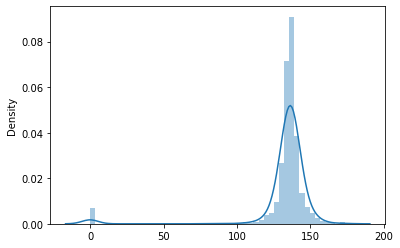

absolute magnitude of turn of point = 2.9125
converting this into relative luminosity,
relative luminosity of turn point = 5.533
thus, the age of the cluster is about 1.629e+9 years


,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,dist,M,lum_calc,Tk_calc,R_calc,brghtnes
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,286.809906,8.396202,0.035442,2967.981218,0.953435,4.201813
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN,124.578559,2.020950,12.578243,7971.951351,NaN,12.387819
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN,117.511076,10.751619,0.004049,2422.014607,NaN,3.783973
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,154.004943,6.985679,0.129936,3538.852567,1.061855,6.962634
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,373.821332,8.590890,0.029624,2856.065168,0.930819,3.431776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,173.016572,5.662324,0.439613,3779.218443,1.688353,8.033223
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986,138.380855,2.481108,8.232975,6767.605218,2.056443,11.699498
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280,479.601745,7.098074,0.117158,3631.846532,0.959989,4.383508
985,17.422070,57.441505,22.895388,1.730391,2.049238,NaN,NaN,NaN,577.904101,8.612791,0.029032,3082.560126,NaN,2.463916


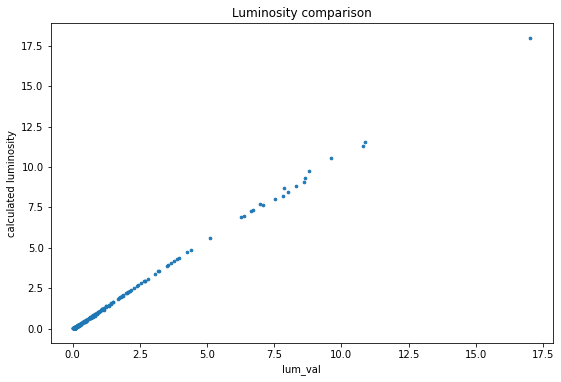

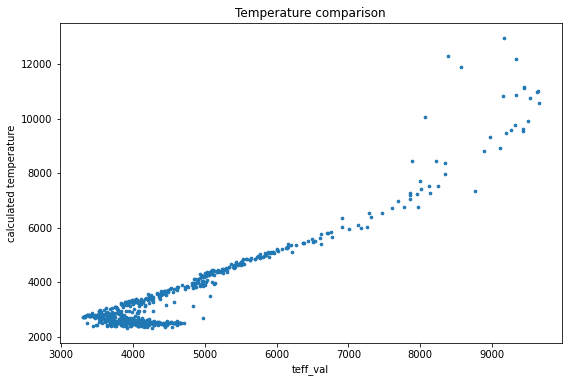

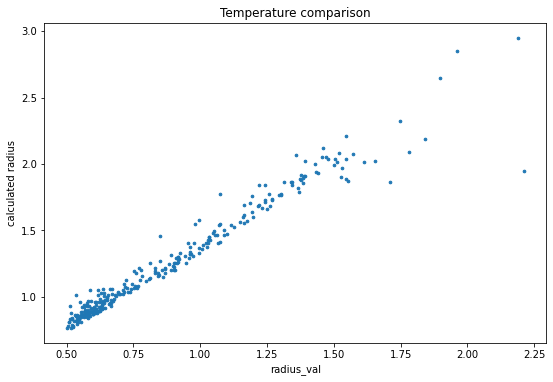

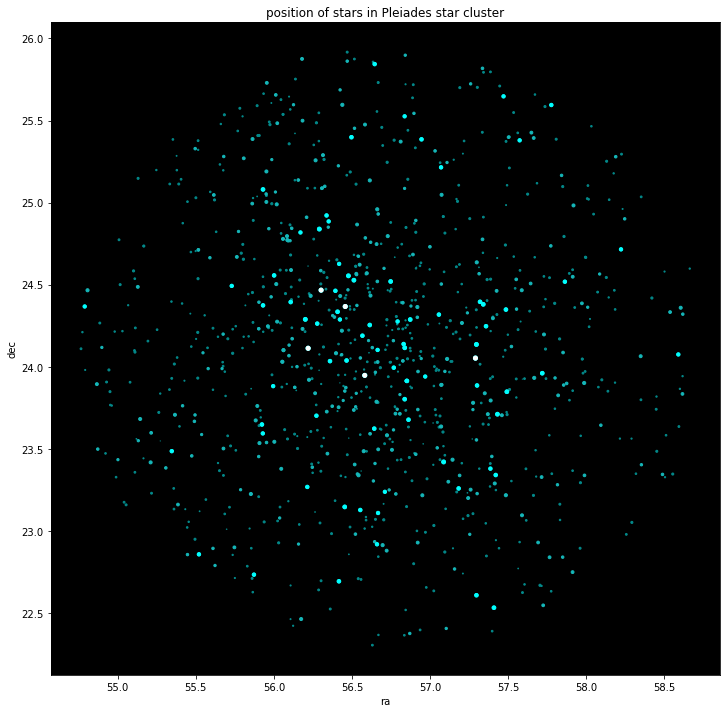

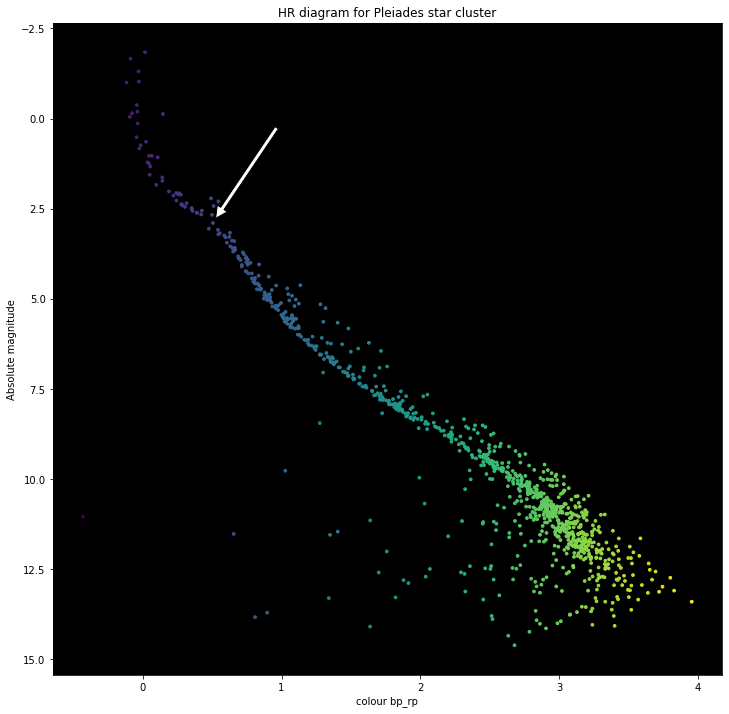

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Pleiades_Cluster.csv")

#question 1
plx = data.loc[:, "plx"].values
dist = 1000/plx
gmag = data.loc[:,"gmag"].values

for i in range (len(dist)):
    if dist[i] > 200:
        dist[i] = 0
M = gmag + 5 - 5*np.log(dist)
sns.distplot(dist, hist = True)
plt.show()
avg_dist = np.average(dist)


#question 2
data["dist"] = 1000/data["plx"]
data["M"] = data["gmag"] + 5 - 5*np.log10(data["dist"])
data['lum_calc'] = 10**((4.77 - data['M'])/2.5)
data['Tk_calc'] = 5601/(data['bp_rp'] + 0.4)**(2/3)
data['R_calc'] = ((data['lum_val'])**0.5)/(data['Tk_calc']/5800)**2
fig1 = plt.figure()
plt.subplot(3,1,1)
plt.scatter(data['lum_val'],data['lum_calc'], s = 7)
plt.xlabel('lum_val', size = 10)
plt.ylabel('calculated luminosity', size = 10)
plt.title('Luminosity comparison')
fig1.set_figwidth(9)
fig1.set_figheight(20)

fig2 = plt.figure()
plt.subplot(3,1,2)
plt.scatter(data['teff_val'],data['Tk_calc'], s = 7)
plt.xlabel('teff_val', size = 10)
plt.ylabel('calculated temperature', size = 10)
plt.title('Temperature comparison')
fig2.set_figwidth(9)
fig2.set_figheight(20)

fig3 = plt.figure()
plt.subplot(3,1,3)
plt.scatter(data['radius_val'],data['R_calc'], s = 7)
plt.xlabel('radius_val', size = 10)
plt.ylabel('calculated radius', size = 10)
plt.title('Temperature comparison')
fig3.set_figwidth(9)
fig3.set_figheight(20)


#question 3
gmag_max = data["gmag"].max()
data["brghtnes"] = gmag_max - data["gmag"]
df1=data[data['brghtnes']<=5]
df2=data[data['brghtnes']>5]
df3=data[data['brghtnes']>10]
df4=data[data['brghtnes']>15]
fig0 = plt.figure()
ax = fig0.add_subplot(1, 1, 1)
plt.scatter(df1['ra'],df1['dec'], s = df1['brghtnes'], c = '#03898A')
plt.scatter(df2['ra'],df2['dec'], s = df2['brghtnes'], c = '#15B7B9')
plt.scatter(df3['ra'],df3['dec'], s = df3['brghtnes'], c = 'cyan')
plt.scatter(df4['ra'],df4['dec'], s = df4['brghtnes'], c = 'white')


plt.xlabel('ra', size = 10)
plt.ylabel('dec', size = 10)
plt.title('position of stars in Pleiades star cluster')
ax.set_facecolor('black')
fig0.set_figwidth(12)
fig0.set_figheight(12)


#question 4
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(data['bp_rp'],data['M'], s = 7.5, c = data['bp_rp'])
plt.xlabel('colour bp_rp', size = 10)
plt.ylabel('Absolute magnitude', size = 10)
plt.title('HR diagram for Pleiades star cluster')
ax.set_facecolor('black')
plt.gca().invert_yaxis()
fig.set_figwidth(12)
fig.set_figheight(12)
ax.annotate('turnoff point', xy=(0.5, 2.9125), xytext=(1, 0),
            arrowprops=dict(facecolor='white', shrink=0.05))

print("absolute magnitude of turn of point = 2.9125")
print("converting this into relative luminosity,")
print("relative luminosity of turn point = 5.533")
print("thus, the age of the cluster is about 1.629e+9 years")
display(data)


















